In [11]:
	
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import torch
import torch.nn as nn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [44]:
df=pd.read_csv('ionosphere.csv')
X,y= dataset.iloc[ :,:-1], dataset.iloc[:, -1]
X.shape

(351, 34)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [46]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogRegSimple():
    def __init__(self, lr=0.1, n_epoch=100):
        self.lr=lr
        self.n_epoch=n_epoch
        self.weights=None
        self.bias=None

    def __forward__(self, X):
        return sigmoid(np.dot(X, self.weights)+self.bias)

    def fit(self, X, y):
        self.weights=[0]*X.shape[1]
        self.bias=0


        for epoch in range(self.n_epoch):
            y_pred=self.__forward__(X)
            loss=(np.dot(-y, np.log(y_pred))-np.dot(1-y, np.log(1-y_pred)))/X.shape[0]

            self.weights=self.weights+self.lr*np.dot(X.T, y-y_pred)/X.shape[0]
            self.bias+=self.lr*(y-y_pred).mean()

        return self

    def predict(self, X):
        return self.__forward__(X).round()
    def param(self):
        return self.weights, self.bias

In [47]:
model=LogRegSimple(lr=0.1,n_epoch=200)
model.fit(X_train, y_train)

X_2d = X_train[:, :2] 
model_2d = LogRegSimple(lr=0.1, n_epoch=200)
model_2d.fit(X_2d, y_train)

w = model_2d.weights  
b = model_2d.bias

xv=np.arange(-2,5, 0.1)

In [48]:
y_test_pred=model.predict(X_test)
confusion_matrix(y_test,y_test_pred)

array([[17,  6],
       [ 3, 45]])

In [49]:
SKLLogReg = LogisticRegression()
SKLLogReg.fit(X_train, y_train)
predictions =SKLLogReg.predict(X_test)
confusion_matrix(y_test, predictions)

array([[18,  5],
       [ 5, 43]])

In [50]:
SKLLogReg2 = SGDClassifier(loss='log_loss', max_iter=200, learning_rate='constant', eta0=0.1)
SKLLogReg2.fit(X_train, y_train)
predictions =SKLLogReg2.predict(X_test)
confusion_matrix(y_test, predictions)

array([[18,  5],
       [ 6, 42]])

In [55]:
X_train2=torch.tensor(X_train, dtype=torch.float)
y_train2=torch.tensor(y_train, dtype=torch.float)
X_test2=torch.tensor(X_test, dtype=torch.float)
y_test2=torch.tensor(np.array(y_test), dtype=torch.float)

In [57]:
n_samples, n_features = X_train.shape
y_train2=y_train2.reshape(-1, 1)
y_test2=y_test2.reshape(-1,1)

In [58]:
class PTLogisticRegression(nn.Module):
    def __init__(self, n_features):
        super(PTLogisticRegression, self).__init__()
        self.linear= nn.Linear(n_features, 1)
    def forward(self,x):
        y_pred=torch.sigmoid(self.linear(x))
        return y_pred

In [83]:
lr=0.1
n_epoch=100

In [84]:
model=PTLogisticRegression(n_features)

lossfunc=nn.BCELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=lr, weight_decay=0)

In [85]:
train_loss=[]
test_loss=[]


for epoch in range(n_epoch):
    model.train()
    y_pred=model(X_train2)
    loss=lossfunc(y_pred, y_train2)
    loss.backward()
    train_loss.append(loss.item())
    optimizer.step()
    optimizer.zero_grad()



    model.eval()
    with torch.inference_mode():
        y_test_pred=model(X_test2)
        lost_test=lossfunc(y_test_pred, y_test2)
        test_loss.append(lost_test)


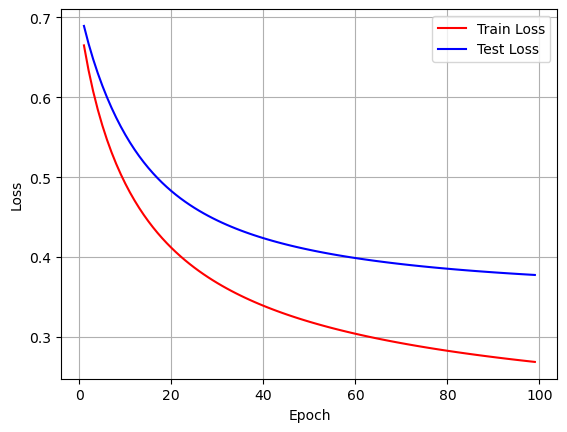

In [86]:
fig=plt.figure()
xv=np.arange(1, n_epoch,1)
plt.plot(xv,train_loss[1:], 'r', label="Train Loss")
plt.plot(xv,test_loss[:-1], 'b', label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()